<a href="https://colab.research.google.com/github/skyshine460/music_genre/blob/main/submission_musicgenre_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 初期設定

In [515]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from scipy.stats import norm

In [516]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# データの読み込み

In [517]:
train = pd.read_csv("/content/drive/MyDrive/楽曲のジャンル推定チャレンジ！！（SOTA：SIGNATE Student Cup 2021春）/提供データ/train.csv")
test = pd.read_csv("/content/drive/MyDrive/楽曲のジャンル推定チャレンジ！！（SOTA：SIGNATE Student Cup 2021春）/提供データ/test.csv")
sample_submit = pd.read_csv("/content/drive/MyDrive/楽曲のジャンル推定チャレンジ！！（SOTA：SIGNATE Student Cup 2021春）/提供データ/sample_submit.csv", header=None)
genre_labels = pd.read_csv("/content/drive/MyDrive/楽曲のジャンル推定チャレンジ！！（SOTA：SIGNATE Student Cup 2021春）/提供データ/genre_labels.csv")

In [518]:
# 各カラムのデータ型と欠損値（nan）を表示
def information_df(df):
    pd.set_option('display.max_rows', None)
    type_series = df.dtypes
    nunique_series = df.nunique()
    nan_count_series = df.isnull().sum()
    unique_values_series = df.apply(lambda col: list(col.unique()))
    info_df = pd.DataFrame({
        'dtypes': type_series,
        'NaN Count': nan_count_series,
        'Nunique': nunique_series,
        'Unique Values': unique_values_series,
    })
    print(df.shape)
    return info_df


information_df(train)

(4046, 14)


,dtypes,NaN Count,Nunique,Unique Values
index,int64,0,4046,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
genre,int64,0,11,"[10, 8, 3, 7, 2, 0, 1, 5, 9, 6, 4]"
popularity,int64,0,82,"[11, 69, 43, 45, 57, 32, 31, 19, 50, 16, 24, 5..."
duration_ms,int64,0,3970,"[201094, 308493, 197225, 301092, 277348, 25260..."
acousticness,float64,0,4046,"[0.1128111339828574, 0.1013332411083806, 0.496..."
positiveness,float64,10,4036,"[0.1572471780947721, 0.3465631954810996, 0.265..."
danceability,float64,8,4038,"[0.1878413799606568, 0.5544436605863335, 0.457..."
loudness,float64,0,4025,"[-1.884852050233595, -5.54649493681357, -9.255..."
energy,float64,0,4046,"[0.8939182385290325, 0.8744085353913282, 0.439..."
liveness,float64,3,4043,"[0.3635681822718619, 0.1938915206606696, 0.217..."


In [519]:
information_df(test)

(4046, 13)


,dtypes,NaN Count,Nunique,Unique Values
index,int64,0,4046,"[4046, 4047, 4048, 4049, 4050, 4051, 4052, 405..."
popularity,int64,0,83,"[43, 40, 58, 49, 50, 44, 64, 54, 20, 62, 37, 4..."
duration_ms,int64,0,3979,"[192465, 226536, 215385, 254494, 230934, 25162..."
acousticness,float64,1,4045,"[0.5598121230375783, 0.1340021537348863, 0.140..."
positiveness,float64,14,4032,"[0.5650351641220922, 0.5425468592281093, 0.643..."
danceability,float64,11,4035,"[0.5222366778174427, 0.4931278872218601, 0.533..."
loudness,float64,0,4025,"[-12.217087234804069, -2.6128461025042173, -3...."
energy,float64,1,4045,"[0.6205095242030846, 0.853089361915109, 0.8344..."
liveness,float64,6,4040,"[0.38972707489484, 0.1631061746172431, 0.42930..."
speechiness,float64,11,4035,"[0.2149894450060735, 0.184183168575654, 0.1673..."


In [520]:
information_df(sample_submit)

(4046, 2)


,dtypes,NaN Count,Nunique,Unique Values
0,int64,0,4046,"[4046, 4047, 4048, 4049, 4050, 4051, 4052, 405..."
1,int64,0,11,"[9, 8, 4, 2, 5, 3, 6, 10, 7, 1, 0]"


In [521]:
genre_labels

,genre,labels
0,country,0
1,electronic,1
2,folk,2
3,hip-hop,3
4,jazz,4
5,latin,5
6,classic,6
7,other-light-music,7
8,pop,8
9,religious,9


# EDA

In [522]:
# object型をカテゴリ型に変換する
for col in train.columns:
    if train[col].dtype == "object":  # object型の列を探す
        train[col] = train[col].astype("category")  # カテゴリ型に変換

Missing values in features: 0


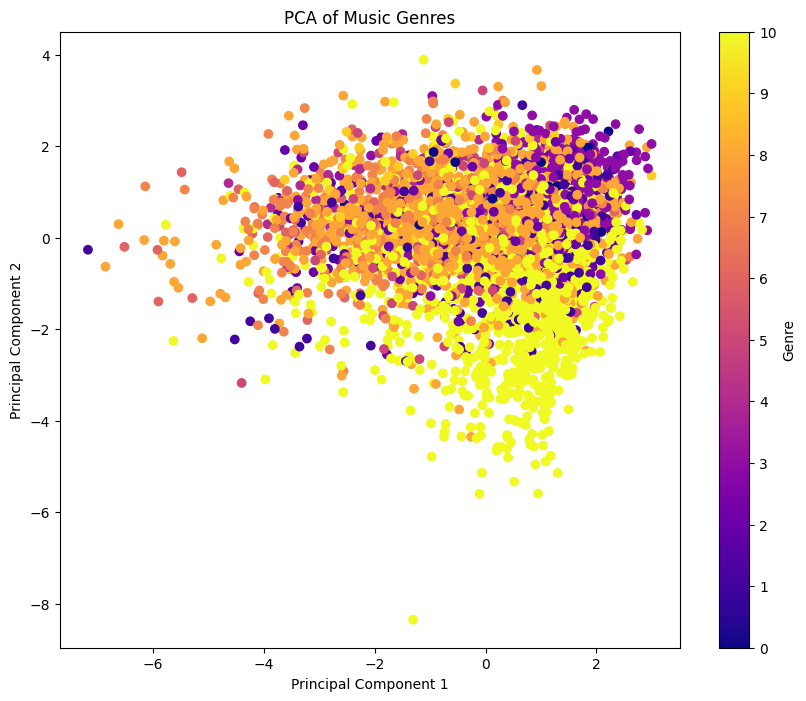

In [523]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# データの前処理: 欠損値を含む行を削除
train_cleaned = train.dropna()  # 欠損値を含む行を削除
train_cleaned = train_cleaned.drop(["tempo", "region"], axis=1)

# 特徴量とターゲット（ジャンル）を用意
df = train_cleaned.drop(columns=['genre'])  # 特徴量
y = train_cleaned['genre']  # ジャンルラベル

# 特徴量に欠損値がないか確認
print("Missing values in features:", df.isnull().sum().sum())

# データの標準化
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCAの実行
pca = PCA(n_components=2)  # 2次元に削減
pca_result = pca.fit_transform(df_scaled)

# 結果をデータフレームに変換
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['genre'] = y.values  # ジャンルラベルを追加

# 可視化
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['genre'].astype('category').cat.codes, cmap='plasma')
plt.title('PCA of Music Genres')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=range(len(np.unique(y))), label='Genre')
plt.show()




In [524]:
# import pandas as pd

# # ユニークなジャンルを取得し、ワンホットエンコーディングを適用
# genre_dummies = pd.get_dummies(train["genre"], prefix='genre')
# genre_dummies = genre_dummies.astype(int)

# # 元のデータフレームにワンホットエンコーディングしたカラムを結合
# train = pd.concat([train, genre_dummies], axis=1)

# # 結果を表示
# train.head()

In [525]:
train_eda = train.copy()

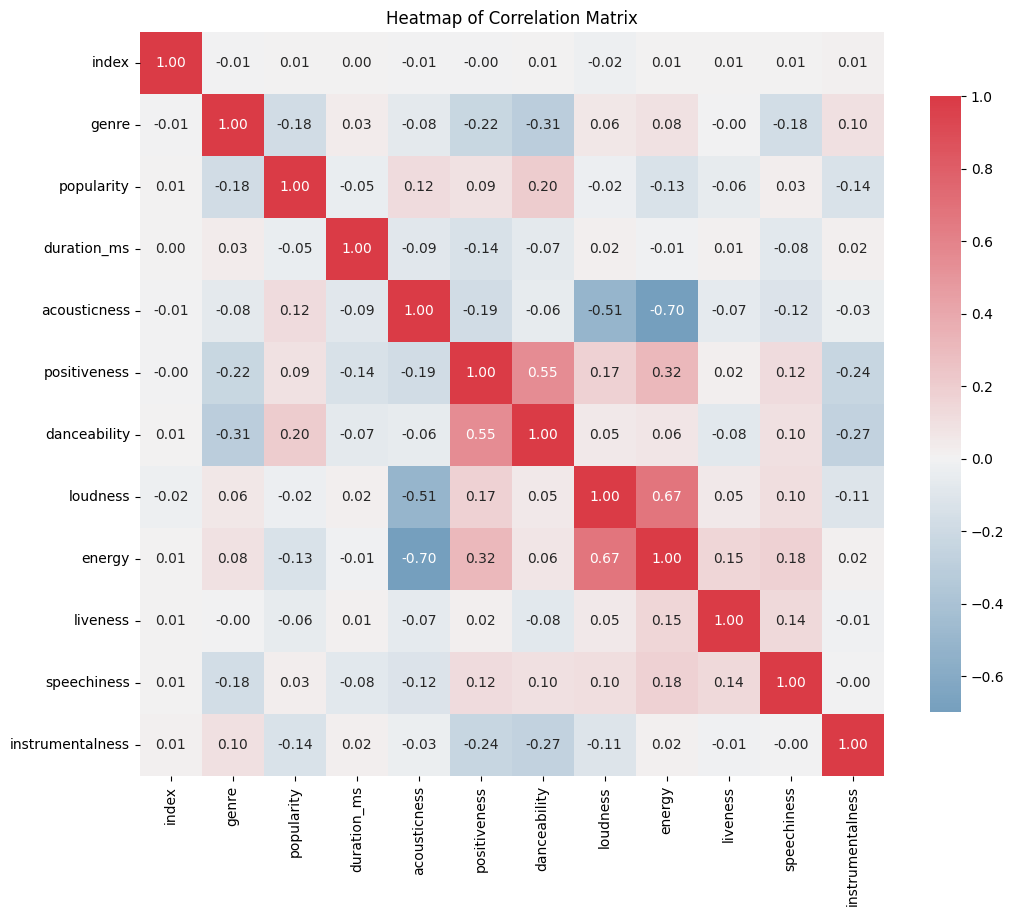

In [526]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(df):
    # 数値データのみを抽出
    numeric_df = df.select_dtypes(include=['number'])

    # 相関行列を計算
    correlation_matrix = numeric_df.corr()

    # ヒートマップを描画
    plt.figure(figsize=(12, 10))  # サイズを大きくする
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt='.2f',
        cmap=sns.diverging_palette(240, 10, as_cmap=True),  # 青から赤のカラーマップ
        center=0,  # 中心を0に設定
        square=True,
        cbar_kws={"shrink": .8},
        annot_kws={"size": 10}  # アノテーションのフォントサイズを設定
    )
    plt.title('Heatmap of Correlation Matrix', fontsize=12)  # タイトルのフォントサイズを設定
    plt.show()

plot_heatmap(train)

In [527]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   index             4046 non-null   int64   
 1   genre             4046 non-null   int64   
 2   popularity        4046 non-null   int64   
 3   duration_ms       4046 non-null   int64   
 4   acousticness      4046 non-null   float64 
 5   positiveness      4036 non-null   float64 
 6   danceability      4038 non-null   float64 
 7   loudness          4046 non-null   float64 
 8   energy            4046 non-null   float64 
 9   liveness          4043 non-null   float64 
 10  speechiness       4038 non-null   float64 
 11  instrumentalness  4045 non-null   float64 
 12  tempo             4046 non-null   category
 13  region            4046 non-null   category
dtypes: category(2), float64(8), int64(4)
memory usage: 388.4 KB


In [528]:
def normal_distribution_fit(df, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # カテゴリデータかどうかを判定
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        # カテゴリデータの場合
        sns.countplot(x=df[col], ax=ax[0])
        ax[0].set_title('Bar Plot of Categorical Data')
    else:
        # 数値データの場合
        sns.histplot(df[col], kde=True, stat='density', ax=ax[0])
        # 正規分布のフィット
        sns.histplot(df[col], stat='density', ax=ax[0], bins=30)
        x = np.linspace(df[col].min(), df[col].max(), 100)
        ax[0].plot(x, norm.pdf(x, df[col].mean(), df[col].std()), color='red')
        ax[0].set_title('Histogram with Normal Distribution Fit')

        # Q-Qプロット
        stats.probplot(df[col], plot=ax[1])
        ax[1].set_title('Q-Q Plot')

    plt.tight_layout()
    plt.show()

    # 数値データの場合のみスキューネスとカートシスを計算
    if df[col].dtype != 'object' and df[col].dtype.name != 'category':
        print(f"Skewness: {df[col].skew()}")
        print(f"Kurtosis: {df[col].kurt()}")

    # 欠損値の確認
    print(f"isnull: {df[col].isnull().sum()}")

In [529]:
def hist_plot_genre(df, col):
  plt.figure(figsize=(12, 4))
  sns.histplot(data=df, x=col, hue='genre', kde=True, multiple='stack', bins=10, palette='plasma')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [530]:
def minmax_scaler(df, col):
    # MinMaxScalerのインスタンスを作成
    scaler = MinMaxScaler()

    # スケーリングを実行
    df[col + '_scal'] = scaler.fit_transform(df[[col]])

    # スケーリングに使用された最小値と最大値を取得
    data_min = scaler.data_min_[0]
    data_max = scaler.data_max_[0]

    return df, scaler, data_min, data_max

In [531]:
def clip_duration(df, col, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = df[col].quantile(lower_quantile)
    upper_bound = df[col].quantile(upper_quantile)
    df[col + "_clip"] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

In [532]:
from scipy.stats import yeojohnson

def yeojohnson_transform(df, col):
    # 欠損値を一時的に削除してYeo-Johnson変換を適用
    transformed_values, lamda_y = yeojohnson(df[col].dropna())

    # 変換された値を元のインデックスに戻し、欠損値の位置にはNaNを入れる
    df[col + "_yeojohnson"] = pd.Series(transformed_values, index=df[col].dropna().index)

    print("lamda_y:", lamda_y)
    return df

In [533]:
def create_features(df, col1, col2):
    # 新しい特徴量を生成
    df[col1+'_'+col2] = df[col1] * df[col2]
    df[col1+'_per_'+col2] = df[col1] / df[col2].replace(0, 1e-5)  # ゼロ除算を避ける
    df[col2+'_per_'+col1] = df[col2] / df[col1].replace(0, 1e-5)  # ゼロ除算を避ける

    return

# popularity（人気度）

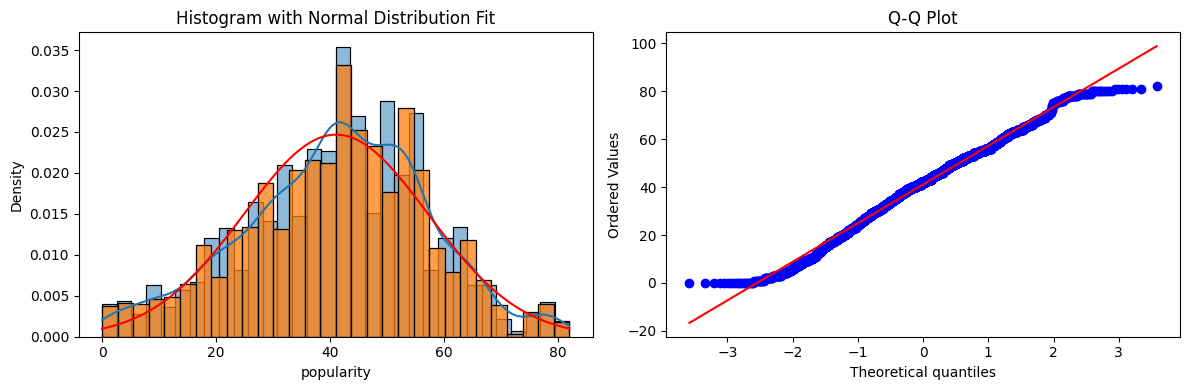

Skewness: -0.1931886929160876
Kurtosis: -0.16217719732673475
isnull: 0


In [534]:
normal_distribution_fit(train, 'popularity')

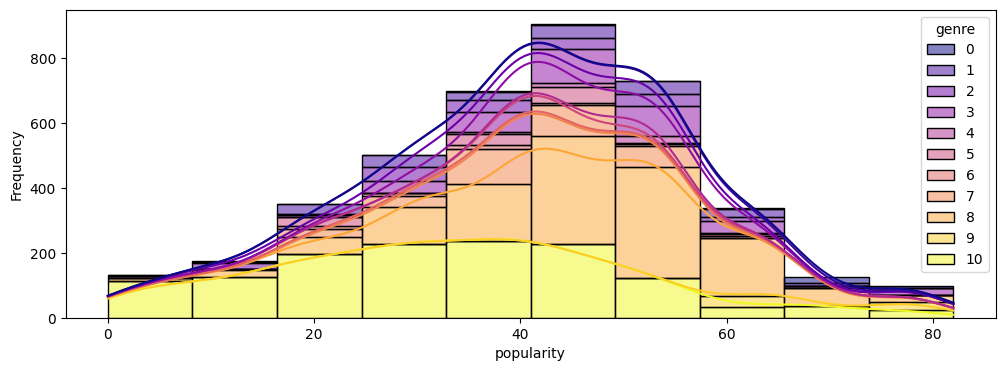

In [535]:
hist_plot_genre(train, 'popularity')

In [536]:
# ビニングのためのビンの境界を定義
bins = [0, 20, 40, 60, 80, 100]
labels = ['very_low', 'low', 'medium', 'high', 'very_high']

# ビニングの実行
train['popularity_bin'] = pd.cut(train['popularity'], bins=bins, labels=labels, right=True)

train.head()

,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region,popularity_bin
0,0,10,11,201094,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,0.390108,0.888884,121-152,region_H,very_low
1,1,8,69,308493,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,0.161497,0.123910,153-176,region_I,high
2,2,3,43,197225,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,0.369057,0.166470,64-76,region_E,medium
3,3,10,45,301092,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,0.226677,0.175399,177-192,region_C,medium
4,4,3,57,277348,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,0.222488,0.226030,97-120,unknown,medium


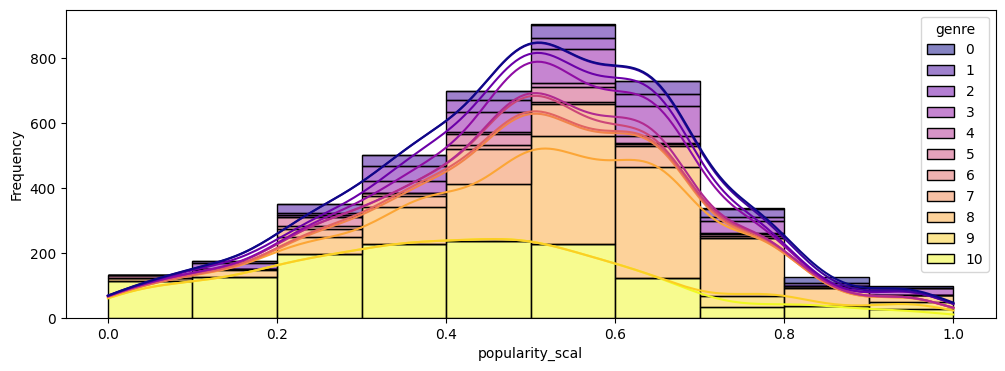

In [537]:
minmax_scaler(train, 'popularity')
hist_plot_genre(train, 'popularity_scal')

★ビニングとスケール変換が必要

# duration_ms（曲の長さ）

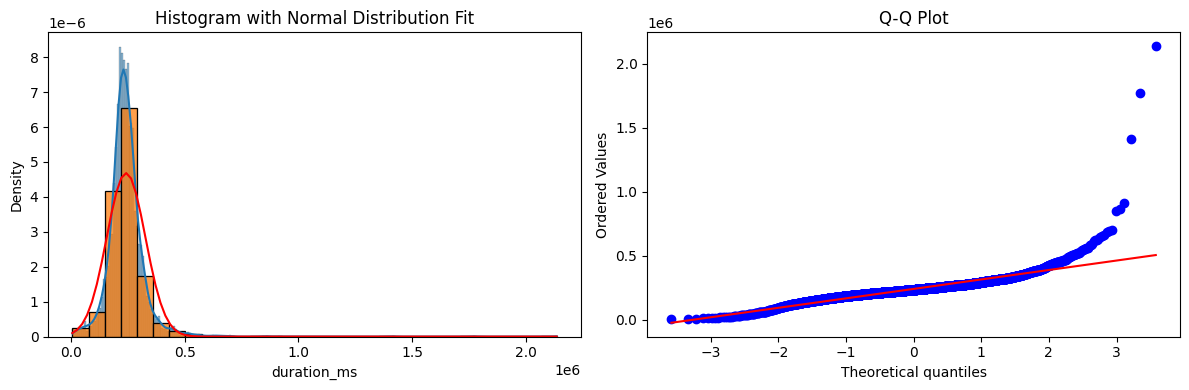

Skewness: 5.618124572116062
Kurtosis: 98.07894066286671
isnull: 0


In [538]:
normal_distribution_fit(train, 'duration_ms')

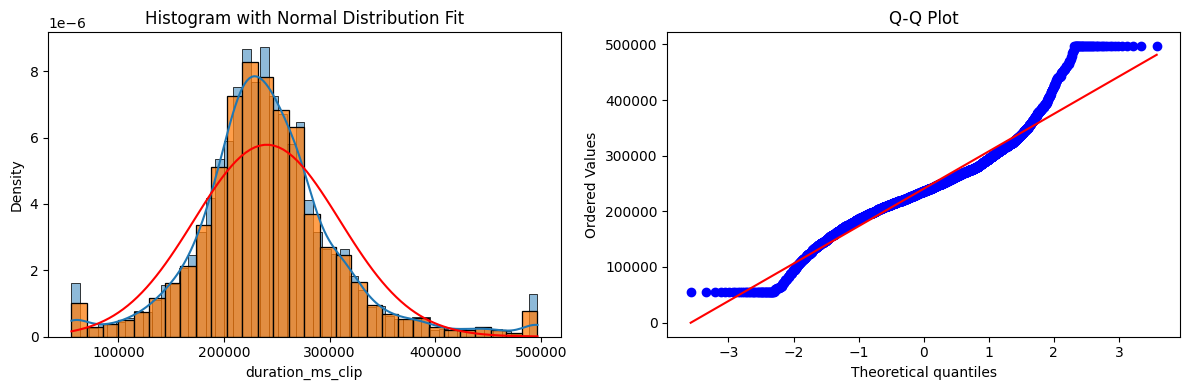

Skewness: 0.6411629532574058
Kurtosis: 2.377020432141135
isnull: 0


In [539]:
clip_duration(train, 'duration_ms', lower_quantile=0.01, upper_quantile=0.99)
normal_distribution_fit(train, 'duration_ms_clip')

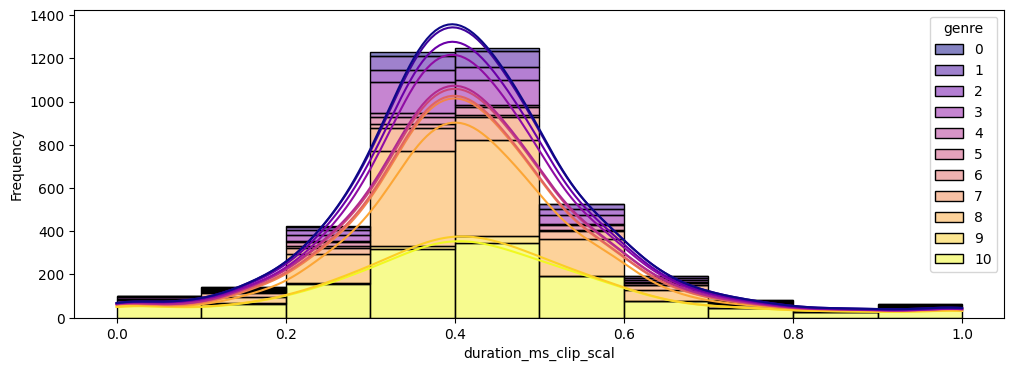

In [540]:
minmax_scaler(train, 'duration_ms_clip')
hist_plot_genre(train, 'duration_ms_clip_scal')

★クリップとスケール変換が必要

# acousticness（アコースティック性）

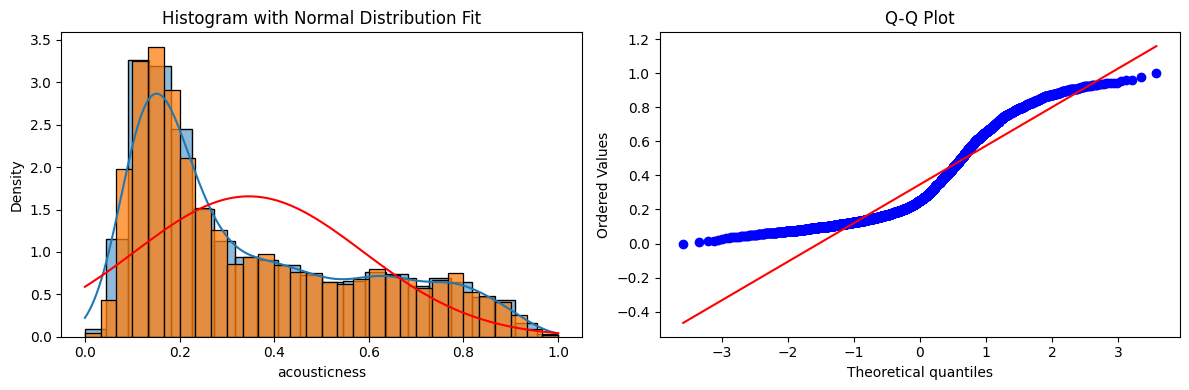

Skewness: 0.807398999088221
Kurtosis: -0.6013623520305091
isnull: 0


In [541]:
normal_distribution_fit(train, 'acousticness')

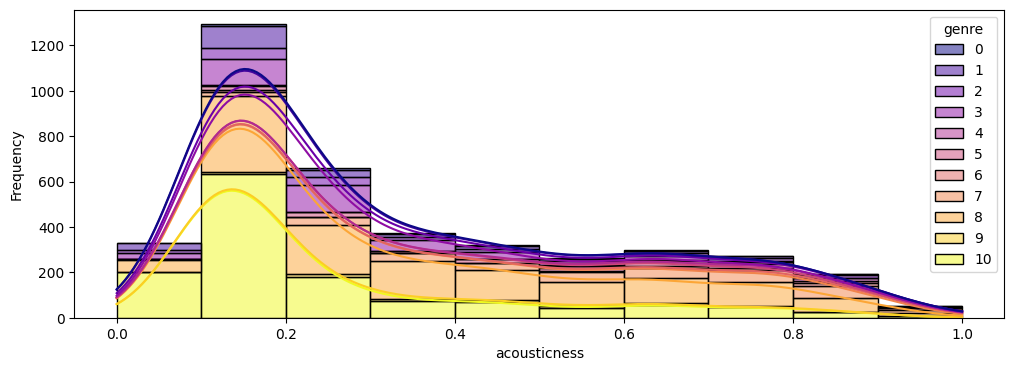

In [542]:
hist_plot_genre(train, 'acousticness')

欠損値も外れ値もないのでそのままとする

# positiveness（ボジティブ性）

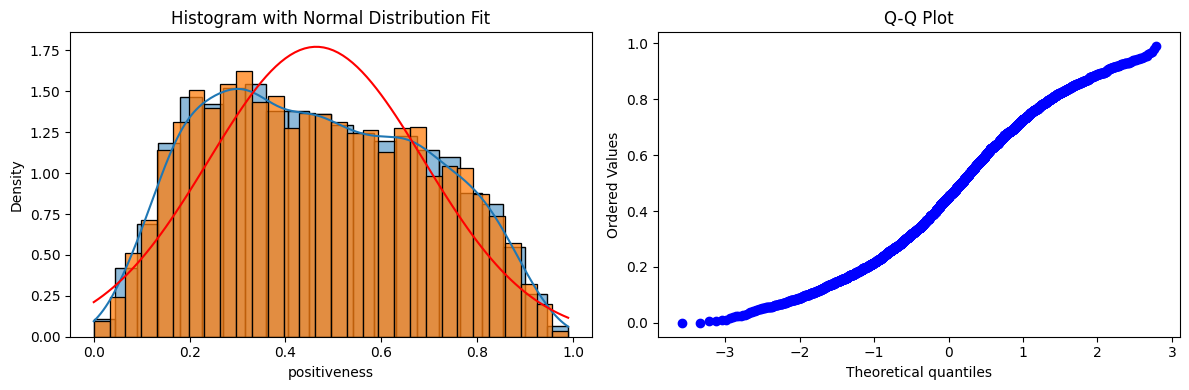

Skewness: 0.16233880923713861
Kurtosis: -0.9867580036835646
isnull: 10


In [543]:
normal_distribution_fit(train, 'positiveness')

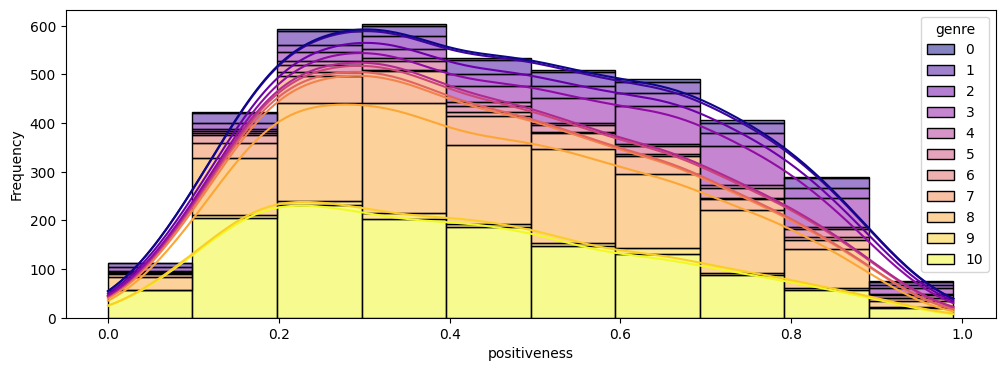

In [544]:
hist_plot_genre(train, 'positiveness')

★欠損値補間が必要

# danceability（踊りやすさ）

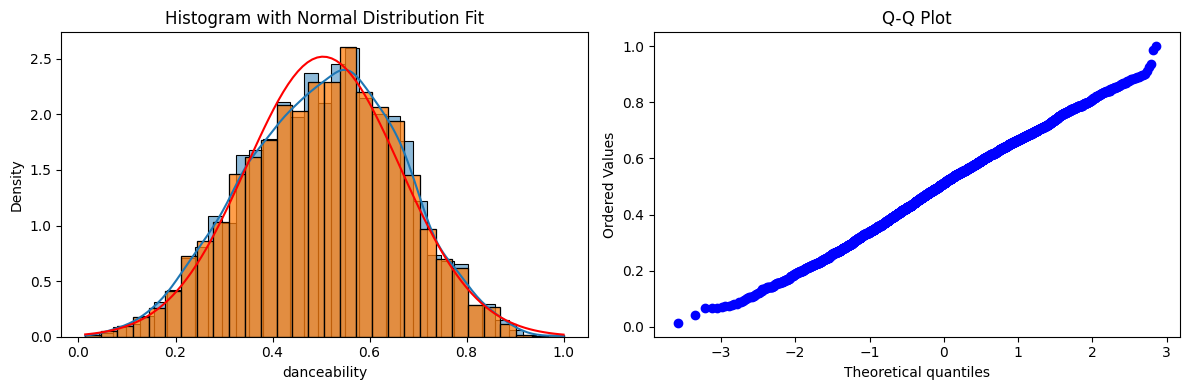

Skewness: -0.11225367214852411
Kurtosis: -0.3650289427287823
isnull: 8


In [545]:
normal_distribution_fit(train, 'danceability')

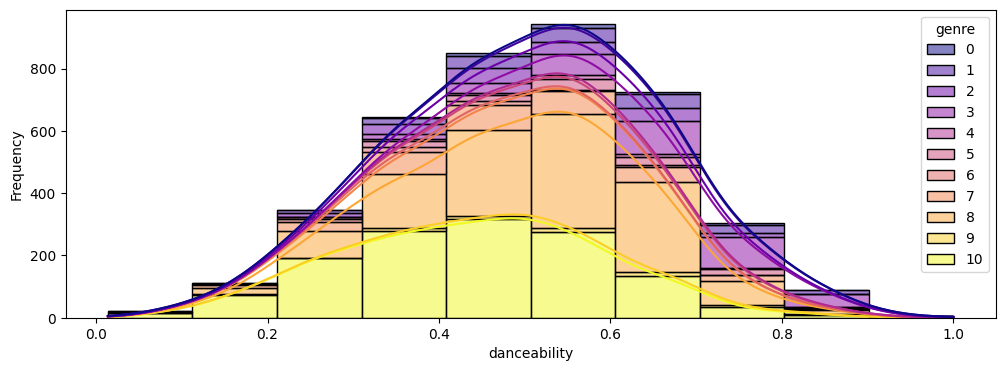

In [546]:
hist_plot_genre(train, 'danceability')

★欠損値補間が必要

# loudness（音量・音圧）

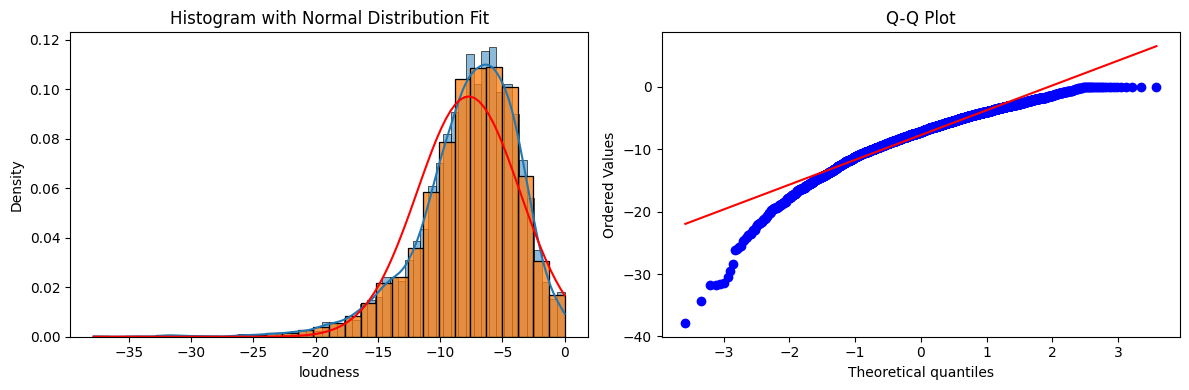

Skewness: -1.2511839396106839
Kurtosis: 3.5743202515288526
isnull: 0


In [547]:
normal_distribution_fit(train, 'loudness')

lamda_y: 1.6186109148092076


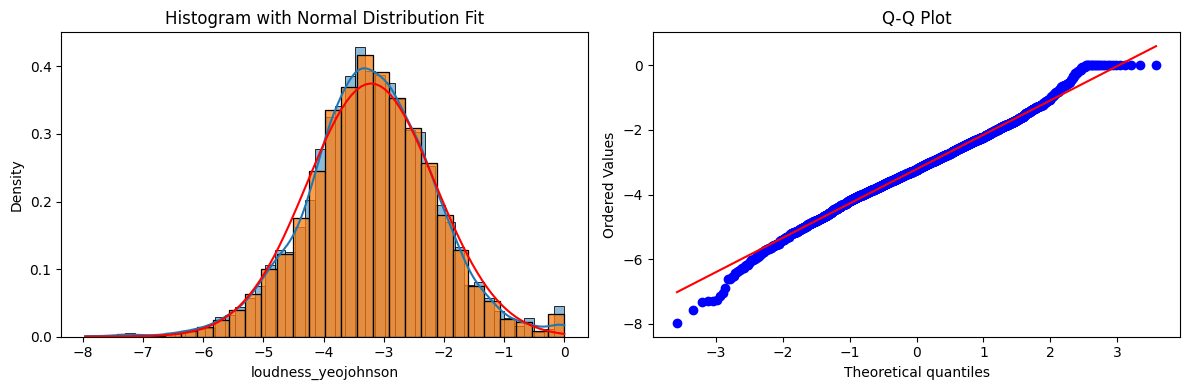

Skewness: -0.04007551987178935
Kurtosis: 0.6845872923778717
isnull: 0


In [548]:
yeojohnson_transform(train, 'loudness')
normal_distribution_fit(train, 'loudness_yeojohnson')

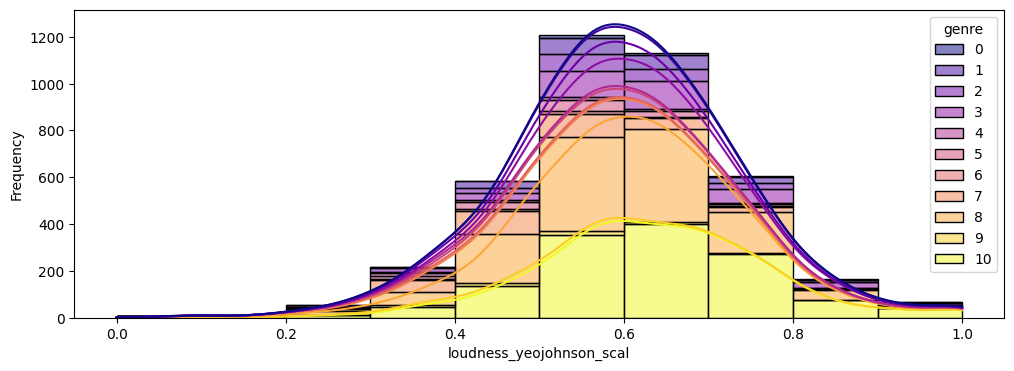

In [549]:
minmax_scaler(train, 'loudness_yeojohnson')
hist_plot_genre(train, 'loudness_yeojohnson_scal')

★yoejohnson変換とスケール変換が必要

# energy（エネルギー性）

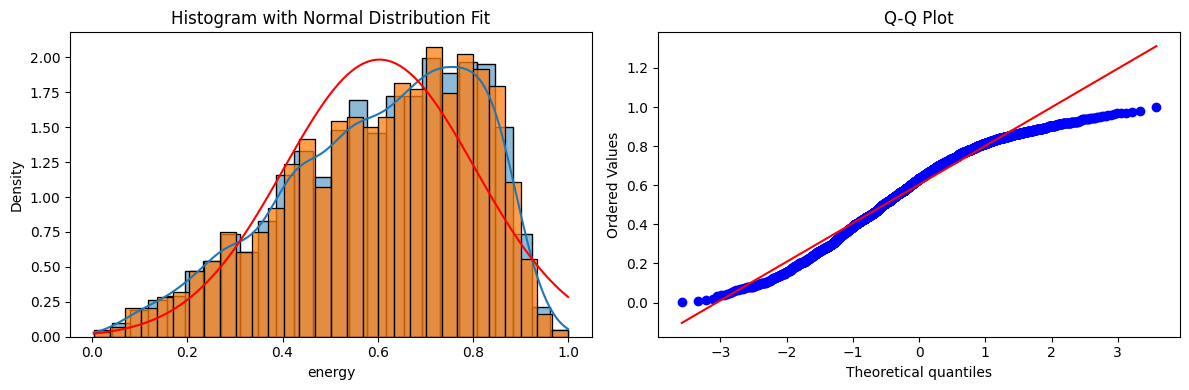

Skewness: -0.527972808859339
Kurtosis: -0.46078173616043383
isnull: 0


In [550]:
normal_distribution_fit(train, 'energy')

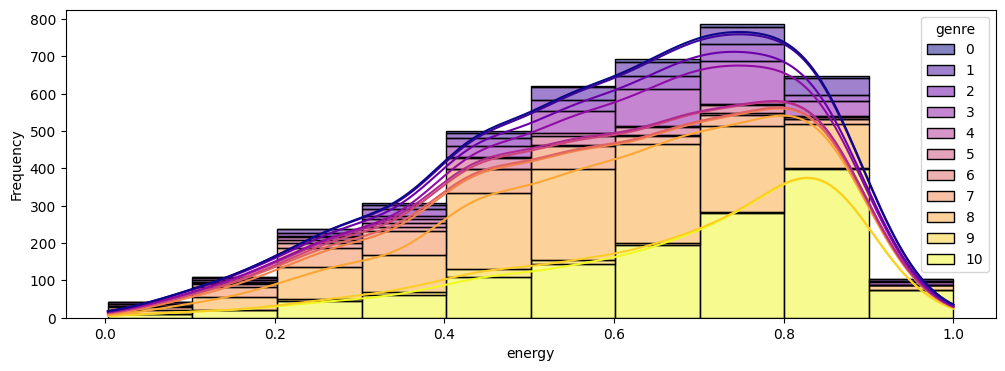

In [551]:
hist_plot_genre(train, 'energy')

欠損値も外れ値もないのでそのままとする

# liveness（ライブ性）

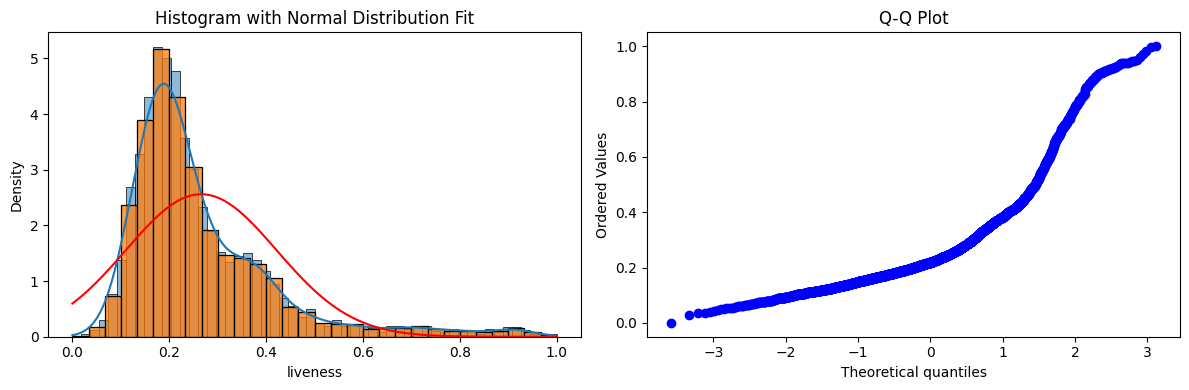

Skewness: 1.978775490436319
Kurtosis: 4.616321054794998
isnull: 3


In [552]:
normal_distribution_fit(train, 'liveness')

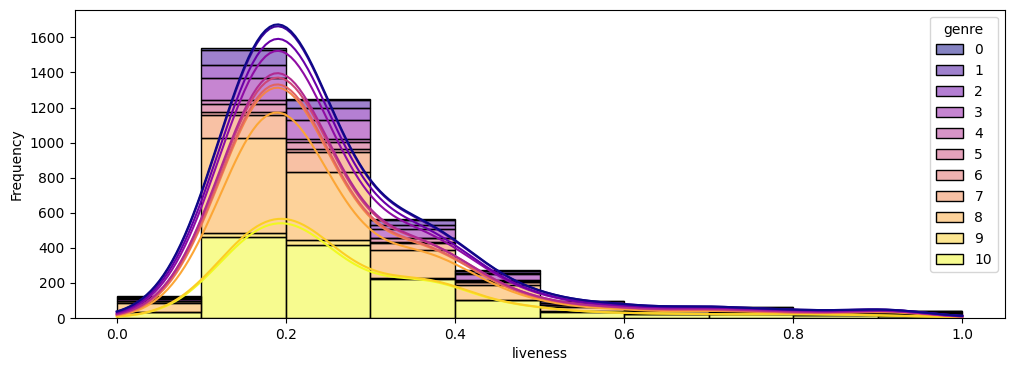

In [553]:
hist_plot_genre(train, 'liveness')

★欠損値の補間が必要

# speechiness（スピーチ性）

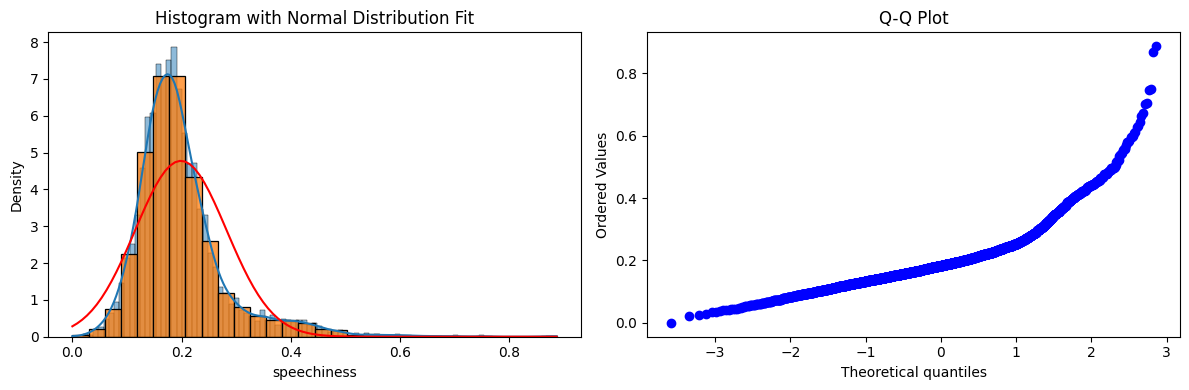

Skewness: 1.9828719313424537
Kurtosis: 7.038617042381643
isnull: 8


In [554]:
normal_distribution_fit(train, 'speechiness')

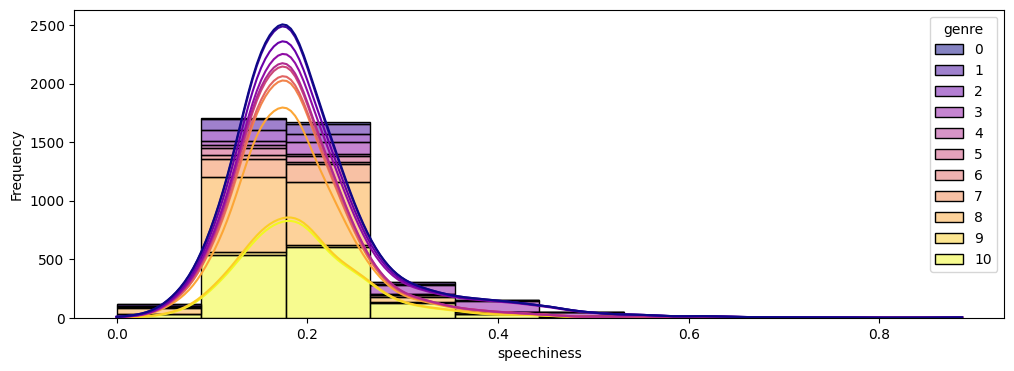

In [555]:
hist_plot_genre(train, 'speechiness')

★欠損値補間が必要

# instrumentalness（インスト性）

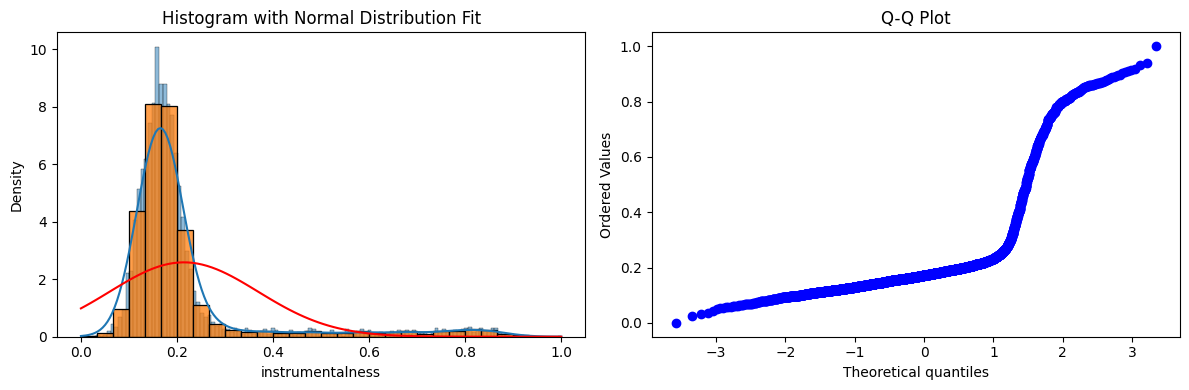

Skewness: 2.881302830041316
Kurtosis: 7.915340044203534
isnull: 1


In [556]:
normal_distribution_fit(train, 'instrumentalness')

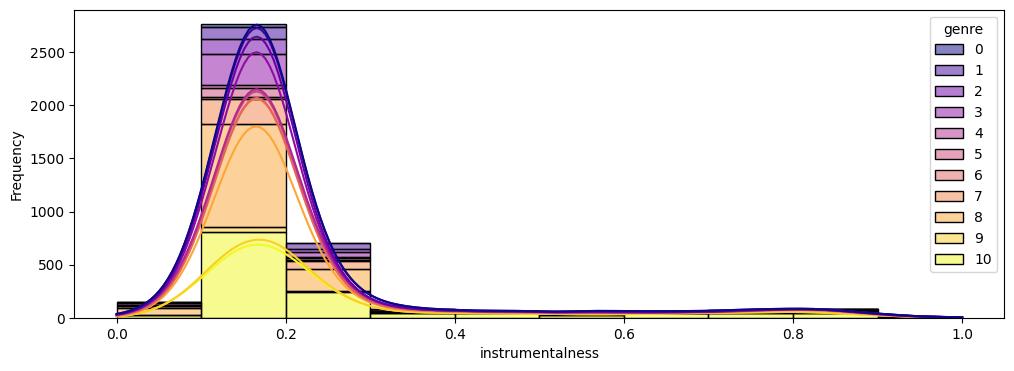

In [557]:
hist_plot_genre(train, 'instrumentalness')

★欠損値補間をする

# tempo（テンポ）

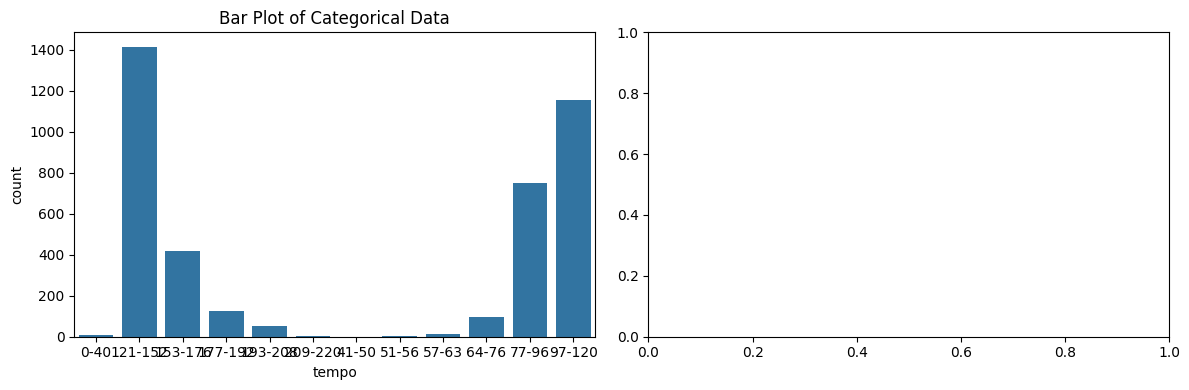

isnull: 0


In [558]:
normal_distribution_fit(train, 'tempo')

テンポ範囲に合わせて数値化したいと思う。
範囲の最小値・中央値・最大値を割り振る。

In [559]:
unique_values = train['tempo'].unique().tolist()
print(unique_values)

['121-152', '153-176', '64-76', '177-192', '97-120', '77-96', '193-208', '57-63', '209-220', '51-56', '0-40', '41-50']


In [560]:
def process_tempo(train):
    # 元の範囲と中心値を定義
    original_uni = ['0-40', '41-50', '51-56', '57-63', '64-76', '77-96', '97-120', '121-152', '153-176', '177-192', '193-208', '209-220']
    under_uni = [0, 41, 51, 57, 64, 77, 97, 121, 153, 177, 193, 209]
    over_uni = [40, 50, 56, 63, 76, 96, 120, 152, 176, 192, 208, 220]
    center_uni = [(a + b) / 2 for a, b in zip(under_uni, over_uni)]

    # 'tempo' カラムを文字列型に変換
    train['tempo'] = train['tempo'].astype(str)

    # 新しいカラムを作成
    train['tempo_center'] = train['tempo'].copy()
    train['tempo_under'] = train['tempo'].copy()
    train['tempo_over'] = train['tempo'].copy()

    # 各範囲に基づいて新しいカラムの値を置き換え
    for i in range(len(original_uni)):
        train.loc[train['tempo_center'] == original_uni[i], 'tempo_center'] = center_uni[i]
        train.loc[train['tempo_under'] == original_uni[i], 'tempo_under'] = under_uni[i]
        train.loc[train['tempo_over'] == original_uni[i], 'tempo_over'] = over_uni[i]

    # 数値型に変換
    train['tempo_center'] = train['tempo_center'].astype(float)
    train['tempo_under'] = train['tempo_under'].astype(float)
    train['tempo_over'] = train['tempo_over'].astype(float)

    return train

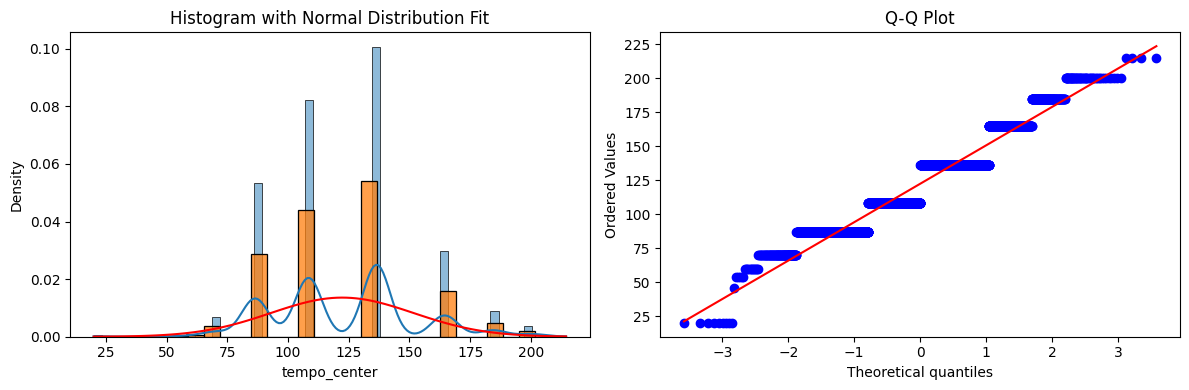

Skewness: 0.2720530403110941
Kurtosis: -0.06379765855696418
isnull: 0


In [561]:
process_tempo(train)
normal_distribution_fit(train, 'tempo_center')

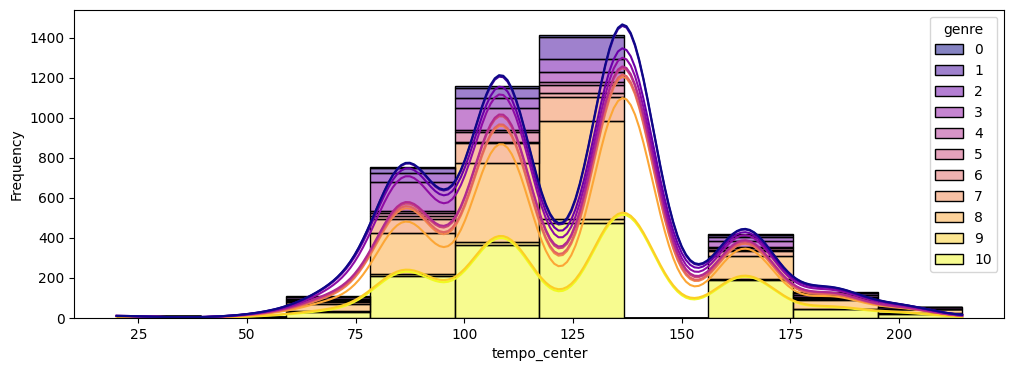

In [562]:
hist_plot_genre(train, 'tempo_center')

★testデータでも変換が必要

# region（地域）

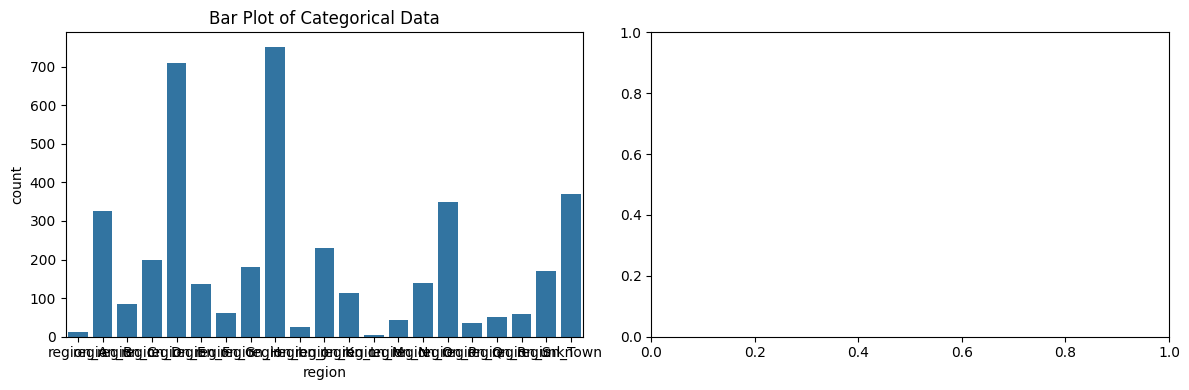

isnull: 0


In [563]:
normal_distribution_fit(train, 'region')

★ワンホットエンコーディングする
Knownは触らない

# trainデータとtestデータの合算処理

In [564]:
train = pd.read_csv("/content/drive/MyDrive/楽曲のジャンル推定チャレンジ！！（SOTA：SIGNATE Student Cup 2021春）/提供データ/train.csv")
test = pd.read_csv("/content/drive/MyDrive/楽曲のジャンル推定チャレンジ！！（SOTA：SIGNATE Student Cup 2021春）/提供データ/test.csv")

In [565]:
train["is_train"] = 1
test["is_train"] = 0

# train_edaにデータを追加していればtestデータにもカラムを追加

merged_df = pd.concat([train, test], ignore_index=True)
merged_df.shape

(8092, 15)

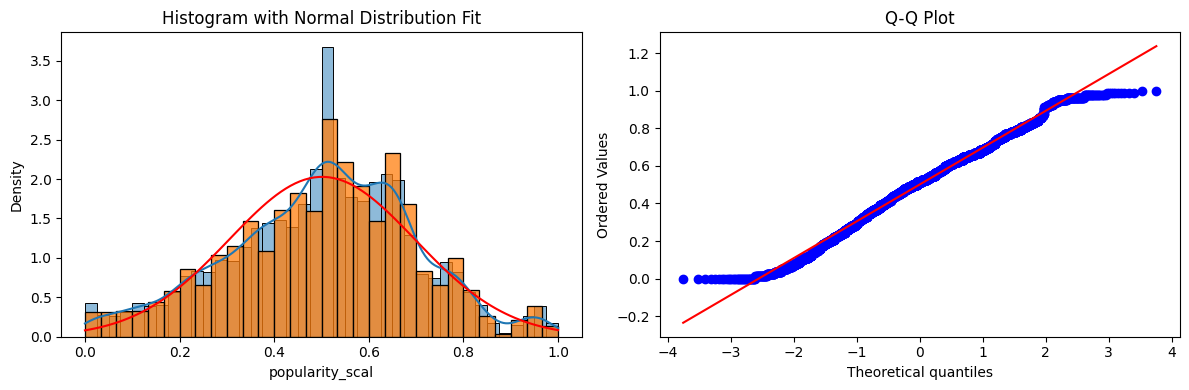

Skewness: -0.19540226367620933
Kurtosis: -0.1573359582996683
isnull: 0


In [566]:
# popularity
# ビニングの実行
merged_df['popularity_bin'] = pd.cut(merged_df['popularity'], bins=bins, labels=labels, right=True)

# スケール変換
minmax_scaler(merged_df, 'popularity')

normal_distribution_fit(merged_df, 'popularity_scal')

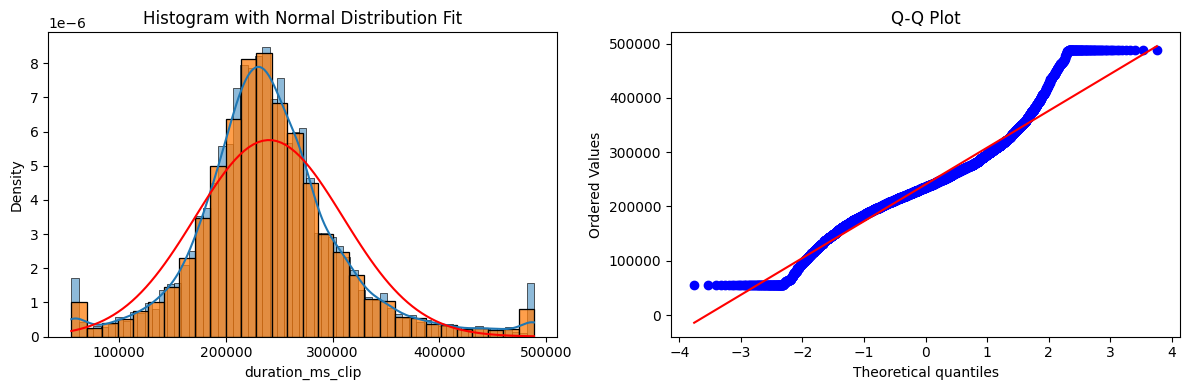

Skewness: 0.614445680357022
Kurtosis: 2.087144668046959
isnull: 0


In [567]:
# duration_ms
clip_duration(merged_df, 'duration_ms', lower_quantile=0.01, upper_quantile=0.99)
minmax_scaler(merged_df, 'duration_ms_clip')

normal_distribution_fit(merged_df, 'duration_ms_clip')

lamda_y: 1.610305776125864


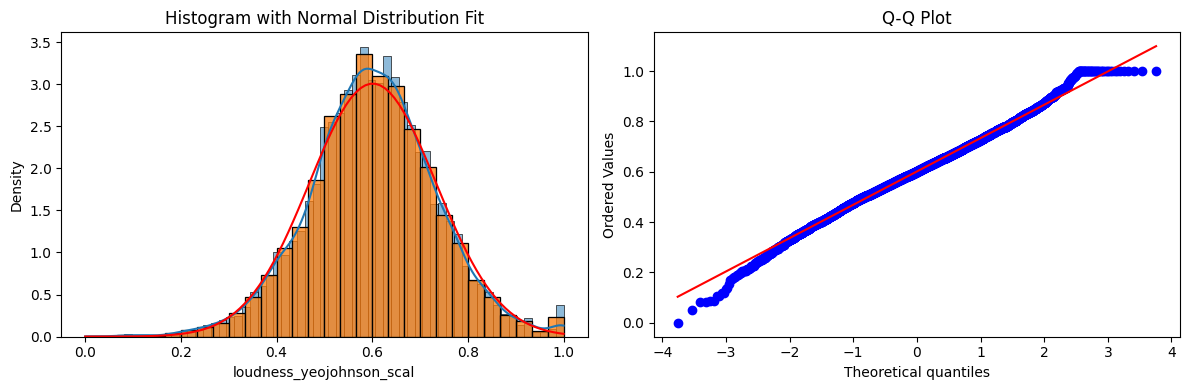

Skewness: -0.031691921822195365
Kurtosis: 0.5333748731048686
isnull: 0


In [568]:
# loudness
yeojohnson_transform(merged_df, 'loudness')
minmax_scaler(merged_df, 'loudness_yeojohnson')
normal_distribution_fit(merged_df, 'loudness_yeojohnson_scal')

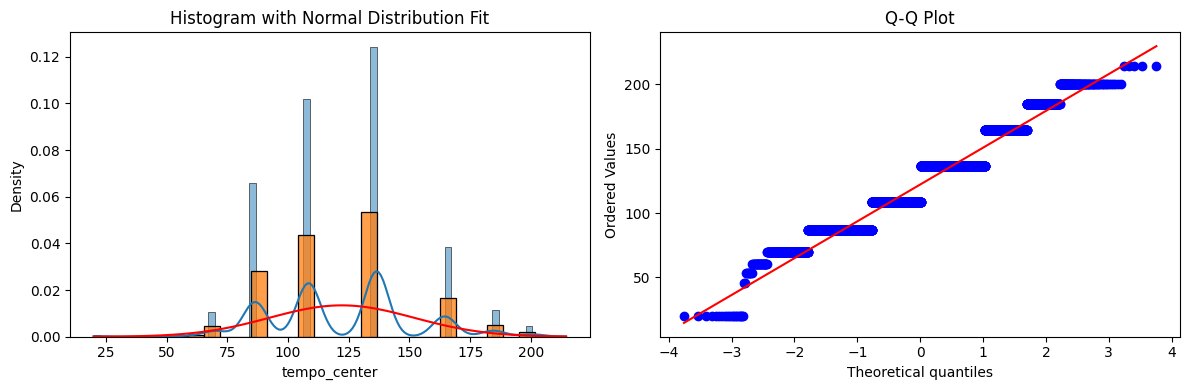

Skewness: 0.23608513496509867
Kurtosis: -0.12018496841158077
isnull: 0


In [569]:
# tempo
process_tempo(merged_df)
normal_distribution_fit(merged_df, 'tempo_center')

In [570]:
# region
# 'region'カラムをワンホットエンコーディング
region_dummies = pd.get_dummies(merged_df['region'], prefix='region')
region_dummies = region_dummies.astype(int)

# 元のデータフレームにワンホットエンコーディングしたカラムを結合
merged_df = pd.concat([merged_df, region_dummies], axis=1)

# 結果を表示
merged_df.columns

Index(['index', 'genre', 'popularity', 'duration_ms', 'acousticness',
       'positiveness', 'danceability', 'loudness', 'energy', 'liveness',
       'speechiness', 'instrumentalness', 'tempo', 'region', 'is_train',
       'popularity_bin', 'popularity_scal', 'duration_ms_clip',
       'duration_ms_clip_scal', 'loudness_yeojohnson',
       'loudness_yeojohnson_scal', 'tempo_center', 'tempo_under', 'tempo_over',
       'region_region_A', 'region_region_B', 'region_region_C',
       'region_region_D', 'region_region_E', 'region_region_F',
       'region_region_G', 'region_region_H', 'region_region_I',
       'region_region_J', 'region_region_K', 'region_region_L',
       'region_region_M', 'region_region_N', 'region_region_O',
       'region_region_P', 'region_region_Q', 'region_region_R',
       'region_region_S', 'region_region_T', 'region_unknown'],
      dtype='object')

In [571]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

numeric_columns = [
       'popularity', 'duration_ms', 'acousticness',
       'positiveness', 'danceability', 'loudness', 'energy', 'liveness',
       'speechiness', 'instrumentalness',
       'popularity_scal', 'duration_ms_clip',
       'duration_ms_clip_scal', 'loudness_yeojohnson',
       'loudness_yeojohnson_scal', 'tempo_center', 'tempo_under', 'tempo_over',
       'region_region_A', 'region_region_B', 'region_region_C',
       'region_region_D', 'region_region_E', 'region_region_F',
       'region_region_G', 'region_region_H', 'region_region_I',
       'region_region_J', 'region_region_K', 'region_region_L',
       'region_region_M', 'region_region_N', 'region_region_O',
       'region_region_P', 'region_region_Q', 'region_region_R',
       'region_region_S', 'region_region_T', 'region_unknown'
       ]

# MinMaxScalerのインスタンスを作成
scaler = MinMaxScaler()

# スケーリングを実行
df_scaled_array = scaler.fit_transform(merged_df[numeric_columns])

# 補間を行うためのKNNImputerを設定
imputer = KNNImputer(n_neighbors=2)

# k-NN補間を使用して欠損値を補完
df_imputed_array = imputer.fit_transform(df_scaled_array)

# 補完されたデータを元のスケールに逆変換
df_imputed_original = scaler.inverse_transform(df_imputed_array)

# 補完されたデータをDataFrameに戻す
df_imputed = pd.DataFrame(df_imputed_original, columns=numeric_columns)

# merged_dfの特定のカラムをdf_imputedで置き換える
merged_df[numeric_columns] = df_imputed

# 欠損値の確認
print(merged_df.isnull().sum())

index                          0
genre                       4046
popularity                     0
duration_ms                    0
acousticness                   0
positiveness                   0
danceability                   0
loudness                       0
energy                         0
liveness                       0
speechiness                    0
instrumentalness               0
tempo                          0
region                         0
is_train                       0
popularity_bin                36
popularity_scal                0
duration_ms_clip               0
duration_ms_clip_scal          0
loudness_yeojohnson            0
loudness_yeojohnson_scal       0
tempo_center                   0
tempo_under                    0
tempo_over                     0
region_region_A                0
region_region_B                0
region_region_C                0
region_region_D                0
region_region_E                0
region_region_F                0
region_reg

In [572]:
train_df = merged_df[merged_df["is_train"] == 1]
test_df = merged_df[merged_df["is_train"] == 0]

print(train_df.shape)
print(test_df.shape)

(4046, 45)
(4046, 45)


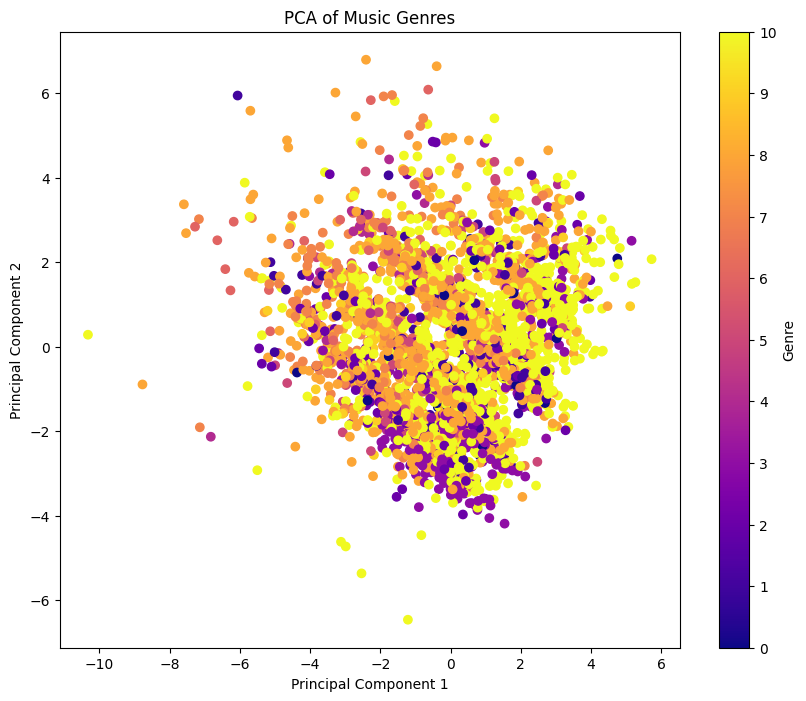

(4046, 48)


In [573]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 特徴量のリスト
feature_num = ['popularity', 'duration_ms', 'acousticness',
               'positiveness', 'danceability', 'loudness',
               'energy', 'liveness', 'speechiness',
               'instrumentalness', 'popularity_scal',
               'duration_ms_clip_scal', 'loudness_yeojohnson_scal',
               'tempo_center', 'tempo_under', 'tempo_over']

# 特徴量とターゲットを抽出
train_cleaned = train_df[feature_num + ['genre']]

# 特徴量とターゲット（ジャンル）を用意
df_train = train_cleaned.drop(columns=['genre'])  # 特徴量
y_train = train_cleaned['genre']  # ジャンルラベル

# データの標準化
scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(df_train)

# PCAの実行
pca = PCA(n_components=2)  # 2次元に削減
pca_train_result = pca.fit_transform(df_train_scaled)

# PCAの結果をデータフレームに変換
pca_train_df = pd.DataFrame(data=pca_train_result, columns=['PC1', 'PC2'])
pca_train_df['genre'] = y_train.values  # ジャンルラベルを追加

# 可視化
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_train_df['PC1'], pca_train_df['PC2'],
                      c=pca_train_df['genre'].astype('category').cat.codes, cmap='plasma')
plt.title('PCA of Music Genres')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=range(len(np.unique(y_train))), label='Genre')
plt.show()

# トレーニングデータにPCAの結果を追加
train_run = pd.concat([train_df.reset_index(drop=True), pca_train_df.reset_index(drop=True)], axis=1)
print(train_run.shape)


In [574]:
# テストデータの標準化（トレーニングデータのスケーラーを使用）
test_num = test_df[feature_num]
df_test_scaled = scaler.transform(test_num)

# テストデータにPCAを適用
pca_test_result = pca.transform(df_test_scaled)

# 結果をデータフレームに変換
pca_test_df = pd.DataFrame(data=pca_test_result, columns=['PC1', 'PC2'])

# テストデータにPCAの結果を追加（必要に応じて）
test_run = pd.concat([test_df.reset_index(drop=True), pca_test_df.reset_index(drop=True)], axis=1)

test_run.shape

(4046, 47)

# 特徴量の追加

# LightGBM

In [575]:
train_run.columns

Index(['index', 'genre', 'popularity', 'duration_ms', 'acousticness',
       'positiveness', 'danceability', 'loudness', 'energy', 'liveness',
       'speechiness', 'instrumentalness', 'tempo', 'region', 'is_train',
       'popularity_bin', 'popularity_scal', 'duration_ms_clip',
       'duration_ms_clip_scal', 'loudness_yeojohnson',
       'loudness_yeojohnson_scal', 'tempo_center', 'tempo_under', 'tempo_over',
       'region_region_A', 'region_region_B', 'region_region_C',
       'region_region_D', 'region_region_E', 'region_region_F',
       'region_region_G', 'region_region_H', 'region_region_I',
       'region_region_J', 'region_region_K', 'region_region_L',
       'region_region_M', 'region_region_N', 'region_region_O',
       'region_region_P', 'region_region_Q', 'region_region_R',
       'region_region_S', 'region_region_T', 'region_unknown', 'PC1', 'PC2',
       'genre'],
      dtype='object')

In [576]:
test_run.columns

Index(['index', 'genre', 'popularity', 'duration_ms', 'acousticness',
       'positiveness', 'danceability', 'loudness', 'energy', 'liveness',
       'speechiness', 'instrumentalness', 'tempo', 'region', 'is_train',
       'popularity_bin', 'popularity_scal', 'duration_ms_clip',
       'duration_ms_clip_scal', 'loudness_yeojohnson',
       'loudness_yeojohnson_scal', 'tempo_center', 'tempo_under', 'tempo_over',
       'region_region_A', 'region_region_B', 'region_region_C',
       'region_region_D', 'region_region_E', 'region_region_F',
       'region_region_G', 'region_region_H', 'region_region_I',
       'region_region_J', 'region_region_K', 'region_region_L',
       'region_region_M', 'region_region_N', 'region_region_O',
       'region_region_P', 'region_region_Q', 'region_region_R',
       'region_region_S', 'region_region_T', 'region_unknown', 'PC1', 'PC2'],
      dtype='object')

In [577]:
feature = ['popularity', 'duration_ms', 'acousticness',
       'positiveness', 'danceability', 'loudness', 'energy', 'liveness',
       'speechiness', 'instrumentalness', 'tempo', 'region', 'is_train',
       'popularity_bin', 'popularity_scal', 'duration_ms_clip',
       'duration_ms_clip_scal', 'loudness_yeojohnson',
       'loudness_yeojohnson_scal', 'tempo_center', 'tempo_under', 'tempo_over',
       'region_region_A', 'region_region_B', 'region_region_C',
       'region_region_D', 'region_region_E', 'region_region_F',
       'region_region_G', 'region_region_H', 'region_region_I',
       'region_region_J', 'region_region_K', 'region_region_L',
       'region_region_M', 'region_region_N', 'region_region_O',
       'region_region_P', 'region_region_Q', 'region_region_R',
       'region_region_S', 'region_region_T', 'region_unknown', 'PC1', 'PC2']

In [578]:
x_train = train_run[feature]
y_train = train_run["genre"]
id_train = train_run["index"]

In [579]:
# object型をカテゴリ型に変換する
for col in x_train.columns:
    if x_train[col].dtype == "object":  # object型の列を探す
        x_train[col] = x_train[col].astype("category")  # カテゴリ型に変換

x_train.dtypes

,0
popularity,float64
duration_ms,float64
acousticness,float64
positiveness,float64
danceability,float64
loudness,float64
energy,float64
liveness,float64
speechiness,float64
instrumentalness,float64


In [580]:
# y_trainがDataFrameの場合、Seriesに変換
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.iloc[:, 0]  # 最初の列を選択してSeriesに変換

# ジャンルのカウントを表示
genre_counts = y_train.value_counts()
genre_counts

,count
genre,
10.0,1337
8.0,1305
3.0,362
7.0,334
1.0,205
2.0,191
5.0,126
9.0,59
6.0,50


In [581]:
import numpy as np
import pandas as pd
import pickle
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import lightgbm as lgb
import matplotlib.pyplot as plt

def train_lgb(input_x, input_y, input_id, params, list_nfold=[0, 1, 2, 3, 4], n_splits=5):
    train_oof = np.zeros(len(input_x))  # Out-of-Fold予測用の配列
    metrics = []
    imp = pd.DataFrame()

    # クロスバリデーションの設定
    cv = list(StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=123).split(input_x, input_y))

    for nfold in list_nfold:
        print("-" * 20, nfold, "-" * 20)

        # データセットの分割
        idx_tr, idx_va = cv[nfold]
        x_tr, y_tr = input_x.iloc[idx_tr], input_y.iloc[idx_tr]
        x_va, y_va = input_x.iloc[idx_va], input_y.iloc[idx_va]
        print("Train shape:", x_tr.shape, "Validation shape:", x_va.shape)

        # モデルのトレーニング
        model = LGBMClassifier(**params)
        model.fit(
            x_tr, y_tr,
            eval_set=[(x_tr, y_tr), (x_va, y_va)],
            callbacks=[
                lgb.early_stopping(stopping_rounds=50, verbose=False),
                lgb.log_evaluation(0)]
        )

        # モデルの保存
        fname_lgb = "model_lgb_fold{}.pickle".format(nfold)
        with open(fname_lgb, "wb") as f:
            pickle.dump(model, f, protocol=4)

        # 評価
        y_tr_pred = model.predict_proba(x_tr)  # 各クラスに対する確率を取得
        y_va_pred = model.predict_proba(x_va)

        # argmaxを使ってクラスラベルに変換
        y_tr_pred_labels = y_tr_pred.argmax(axis=1)  # トレーニングデータの予測クラス
        y_va_pred_labels = y_va_pred.argmax(axis=1)  # バリデーションデータの予測クラス

        # F1スコアの計算
        metric_tr = f1_score(y_tr, y_tr_pred_labels, average='macro')  # トレーニングデータのF1スコア
        metric_va = f1_score(y_va, y_va_pred_labels, average='macro')  # バリデーションデータのF1スコア
        metrics.append([nfold, metric_tr, metric_va])

        # Out-of-Fold予測: クラスラベルに変換して代入
        train_oof[idx_va] = y_va_pred.argmax(axis=1)

        # 特徴量の重要度
        _imp = pd.DataFrame({"col": input_x.columns, "imp": model.feature_importances_, "nfold": nfold})
        imp = pd.concat([imp, _imp])

    print("-" * 20, "Result", "-" * 20)

    # メトリックの表示
    metrics = np.array(metrics)
    print(metrics)
    print("[CV] Train: {:.4f} ± {:.4f}, Validation: {:.4f} ± {:.4f}".format(
        metrics[:, 1].mean(), metrics[:, 1].std(),
        metrics[:, 2].mean(), metrics[:, 2].std(),
    ))

    # Out-of-Fold DataFrame
    train_oof_df = pd.concat([input_id.reset_index(drop=True), pd.DataFrame({"pred": train_oof})], axis=1)

    # 特徴量の重要度を集計
    imp = imp.groupby("col")["imp"].agg(["mean", "std"]).reset_index(drop=False)
    imp.columns = ["col", "imp", "imp_std"]

    return train_oof_df, imp, metrics

In [582]:
def calculate_accuracy_per_genre(train_oof_df, input_y):
    # 予測と実際のラベルを追加
    train_oof_df['true_labels'] = input_y.values

    # ジャンルごとの正解率を計算
    accuracy_per_genre = train_oof_df.groupby('true_labels')['pred'].agg(
        correct=lambda x: (x == x.mode()[0]).sum(),  # 正解数
        total='count'  # 合計数
    ).reset_index()

    # 正解率を計算
    accuracy_per_genre['accuracy'] = accuracy_per_genre['correct'] / accuracy_per_genre['total']

    # カラム名の変更
    accuracy_per_genre.columns = ['genre', 'correct_count', 'total_count', 'accuracy']

    return accuracy_per_genre

In [583]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_confusion_matrix(train_oof_df, input_y):
    # 予測と実際のラベルを追加
    train_oof_df['true_labels'] = input_y.values

    # 混合行列を計算
    cm = confusion_matrix(train_oof_df['true_labels'], train_oof_df['pred'])

    # 混合行列を表示
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(train_oof_df['true_labels']))
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

In [584]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'learning_rate': 0.01,
    'num_leaves': 32,
    'n_estimators': 100000,
    'random_state': 123,
    'importance_type': 'gain',
    'min_split_gain': 0.05,
    'lambda_l1': 0.1,
    'lambda_l2': 5,
    'max_depth': 8,
    'verbosity': -1,  # 出力状況の省略
}

# 学習の実行
train_oof, imp, metrics = train_lgb(
    x_train,
    y_train,
    id_train,
    params,
    list_nfold=[0, 1, 2, 3, 4],
    n_splits=5,
)

-------------------- 0 --------------------
Train shape: (3236, 45) Validation shape: (810, 45)
-------------------- 1 --------------------
Train shape: (3237, 45) Validation shape: (809, 45)
-------------------- 2 --------------------
Train shape: (3237, 45) Validation shape: (809, 45)
-------------------- 3 --------------------
Train shape: (3237, 45) Validation shape: (809, 45)
-------------------- 4 --------------------
Train shape: (3237, 45) Validation shape: (809, 45)
-------------------- Result --------------------
[[0.         0.98403395 0.53226148]
 [1.         0.96142037 0.50745351]
 [2.         0.99081869 0.53553876]
 [3.         0.98548916 0.54121199]
 [4.         0.98545446 0.56796139]]
[CV] Train: 0.9814 ± 0.0103, Validation: 0.5369 ± 0.0194


In [585]:
accuracy_df = calculate_accuracy_per_genre(train_oof, y_train)
accuracy_df

,genre,correct_count,total_count,accuracy
0,0.0,16,32,0.500000
1,1.0,92,205,0.448780
2,2.0,63,191,0.329843
3,3.0,254,362,0.701657
4,4.0,23,45,0.511111
5,5.0,47,126,0.373016
6,6.0,19,50,0.380000
7,7.0,152,334,0.455090
8,8.0,989,1305,0.757854
9,9.0,47,59,0.796610


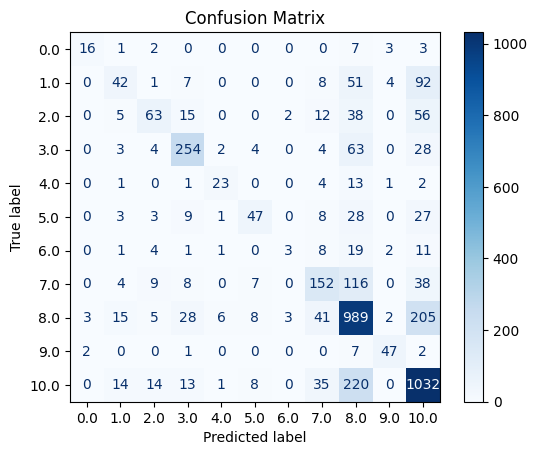

In [586]:
plot_confusion_matrix(train_oof, y_train)

In [587]:
imp.sort_values("imp", ascending=False)

,col,imp,imp_std
14,popularity,93298.815756,2854.089974
18,region,67481.801624,752.253328
2,acousticness,46652.415663,4534.809574
40,speechiness,41225.966236,1130.973973
3,danceability,40938.887947,2934.865483
7,energy,26316.612868,2511.395750
17,positiveness,22040.935719,1422.582378
8,instrumentalness,19560.705826,1298.308896
1,PC2,17310.573792,2102.238300
4,duration_ms,16332.248720,1093.555251


In [588]:
# pip install optuna

In [589]:
# import numpy as np
# import pandas as pd
# import pickle
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import f1_score
# import lightgbm as lgb
# import matplotlib.pyplot as plt
# import optuna

# def train_lgb(input_x, input_y, input_id, params, list_nfold=[0, 1, 2, 3, 4], n_splits=5):
#     train_oof = np.zeros(len(input_x))  # Out-of-Fold予測用の配列
#     metrics = []
#     imp = pd.DataFrame()

#     # クロスバリデーションの設定
#     cv = list(StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=123).split(input_x, input_y))

#     for nfold in list_nfold:
#         print("-" * 20, nfold, "-" * 20)

#         # データセットの分割
#         idx_tr, idx_va = cv[nfold]
#         x_tr, y_tr = input_x.iloc[idx_tr], input_y.iloc[idx_tr]
#         x_va, y_va = input_x.iloc[idx_va], input_y.iloc[idx_va]
#         print("Train shape:", x_tr.shape, "Validation shape:", x_va.shape)

#         # モデルのトレーニング
#         model = LGBMClassifier(**params)
#         model.fit(
#             x_tr, y_tr,
#             eval_set=[(x_tr, y_tr), (x_va, y_va)],
#             callbacks=[
#                 lgb.early_stopping(stopping_rounds=50, verbose=False),
#                 lgb.log_evaluation(0)]
#         )

#         # モデルの保存
#         fname_lgb = "model_lgb_fold{}.pickle".format(nfold)
#         with open(fname_lgb, "wb") as f:
#             pickle.dump(model, f, protocol=4)

#         # 評価
#         y_tr_pred = model.predict_proba(x_tr)  # 各クラスに対する確率を取得
#         y_va_pred = model.predict_proba(x_va)

#         # argmaxを使ってクラスラベルに変換
#         y_tr_pred_labels = y_tr_pred.argmax(axis=1)  # トレーニングデータの予測クラス
#         y_va_pred_labels = y_va_pred.argmax(axis=1)  # バリデーションデータの予測クラス

#         # F1スコアの計算
#         metric_tr = f1_score(y_tr, y_tr_pred_labels, average='macro')  # トレーニングデータのF1スコア
#         metric_va = f1_score(y_va, y_va_pred_labels, average='macro')  # バリデーションデータのF1スコア
#         metrics.append([nfold, metric_tr, metric_va])

#         # Out-of-Fold予測: クラスラベルに変換して代入
#         train_oof[idx_va] = y_va_pred.argmax(axis=1)

#         # 特徴量の重要度
#         _imp = pd.DataFrame({"col": input_x.columns, "imp": model.feature_importances_, "nfold": nfold})
#         imp = pd.concat([imp, _imp])

#     print("-" * 20, "Result", "-" * 20)

#     # メトリックの表示
#     metrics = np.array(metrics)
#     print(metrics)
#     print("[CV] Train: {:.4f} ± {:.4f}, Validation: {:.4f} ± {:.4f}".format(
#         metrics[:, 1].mean(), metrics[:, 1].std(),
#         metrics[:, 2].mean(), metrics[:, 2].std(),
#     ))

#     # Out-of-Fold DataFrame
#     train_oof_df = pd.concat([input_id.reset_index(drop=True), pd.DataFrame({"pred": train_oof})], axis=1)

#     # 特徴量の重要度を集計
#     imp = imp.groupby("col")["imp"].agg(["mean", "std"]).reset_index(drop=False)
#     imp.columns = ["col", "imp", "imp_std"]

#     return train_oof_df, imp, metrics

# # 目的関数の定義
# def objective(trial):
#     params = {
#         'boosting_type': 'gbdt',
#         'objective': 'multiclass',
#         'metric': 'multi_logloss',
#         'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 150),
#         'n_estimators': 100000,
#         'random_state': 123,
#         'importance_type': 'gain',
#         'min_split_gain': trial.suggest_uniform('min_split_gain', 0.0, 0.1),
#         'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-3, 10.0),
#         'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-3, 10.0),
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'verbosity': -1,
#     }

#     # クロスバリデーションの設定
#     skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
#     scores = []

#     for train_idx, val_idx in skf.split(x_train, y_train):
#         x_tr, x_val = x_train.iloc[train_idx], x_train.iloc[val_idx]
#         y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

#         model = LGBMClassifier(**params)
#         model.fit(x_tr, y_tr, eval_set=[(x_val, y_val)],
#                 callbacks=[
#                 lgb.early_stopping(stopping_rounds=50, verbose=False),
#                 lgb.log_evaluation(0)])

#         # バリデーションスコアの計算
#         y_val_pred = model.predict(x_val)
#         score = f1_score(y_val, y_val_pred, average='macro')
#         scores.append(score)

#     return np.mean(scores)

# # Optunaのスタディを作成し、トライアルを実行
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=20)  # 20トライアルを実行

# # 最良のパラメータを表示
# print("Best parameters:", study.best_params)
# print("Best F1 score:", study.best_value)

# # 上位10個のパラメータを表示
# trials = study.get_trials()
# sorted_trials = sorted(trials, key=lambda t: t.value, reverse=True)[:10]
# for trial in sorted_trials:
#     print(f"Trial number: {trial.number}, F1 Score: {trial.value}, Params: {trial.params}")


In [590]:
x_test = test_run[feature]
test_id = test_run["index"]

for col in x_test.columns:
    if x_test[col].dtype == "object":
        x_test[col] = x_test[col].astype("category")

In [591]:
x_test.shape

(4046, 45)

In [592]:
def compare_columns(train, test):
  # train と test のカラム名をセットに変換
  train_columns = set(train.columns)
  test_columns = set(test.columns)

  # カラム名の差分を計算
  train_only = train_columns - test_columns
  test_only = test_columns - train_columns

  print("train only columns:", train_only)
  print("test only columns:", test_only)

compare_columns(x_train, x_test)

train only columns: set()
test only columns: set()


In [593]:
import numpy as np
import pandas as pd
import pickle

# フォールド数
n_folds = 5
# テストデータに対する予測を保存するための配列
test_pred = np.zeros((len(x_test), n_folds, 11))  # ここで11はクラス数

# 各フォールドのモデルをロードし、テストデータに対する予測を行う
for nfold in range(n_folds):
    with open(f"model_lgb_fold{nfold}.pickle", "rb") as f:
        model = pickle.load(f)

    # 各フォールドのモデルで予測
    y_test_pred = model.predict_proba(x_test)  # 各クラスに対する確率を取得
    test_pred[:, nfold, :] = y_test_pred  # 各フォールドの予測を保存

# 各フォールドごとのクラス確率の平均を計算
test_pred_mean = test_pred.mean(axis=1)  # (4046, 11)

# 最も高い確率を持つクラスを決定
predicted_classes = test_pred_mean.argmax(axis=1)

# 結果をデータフレームに変換
test_pred_df = pd.DataFrame({"id": test_id, "pred": predicted_classes})
test_pred_df.head()

,id,pred
0,4046,8
1,4047,10
2,4048,8
3,4049,10
4,4050,8


In [594]:
test_pred_df['pred'].value_counts()

,count
pred,
8,1579
10,1491
3,373
7,280
2,88
1,68
9,56
5,49
4,28


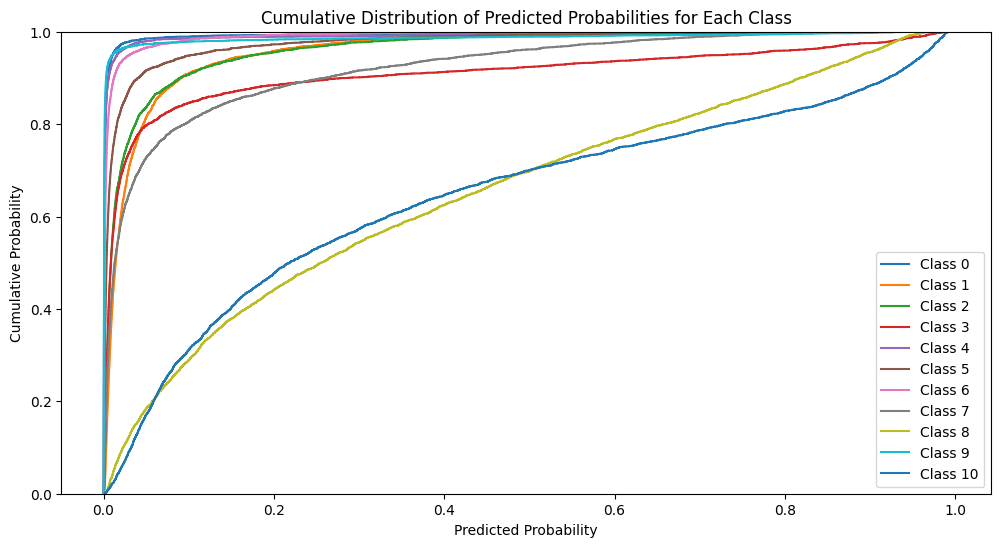

In [595]:
# CDFを描画
plt.figure(figsize=(12, 6))
for i in range(test_pred_mean.shape[1]):
    sns.ecdfplot(test_pred_mean[:, i], label=f'Class {i}')
plt.xlabel("Predicted Probability")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution of Predicted Probabilities for Each Class")
plt.legend()
plt.show()


In [596]:
df_submit = pd.DataFrame({"id": test_id, "pred": predicted_classes})
df_submit.head()

,id,pred
0,4046,8
1,4047,10
2,4048,8
3,4049,10
4,4050,8


In [597]:
df_submit.to_csv("submission_musicgenre_13.csv", index=False, header=False)